<a href="https://colab.research.google.com/github/Sank3t-Pand3y/Neural-Networks_with_Keras/blob/main/Classification_with_KERAS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import keras

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Input
from keras.utils import to_categorical

import numpy as np
import matplotlib.pyplot as plt

## Importing the data i.e. MNIST dataset from the keras library.

In [14]:
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [15]:
X_train.shape

(60000, 28, 28)

The first number in the output tuple is the number of images, and the other two numbers are the size of the images in dataset. So, each imageis 28 pixels by 28 pixels.

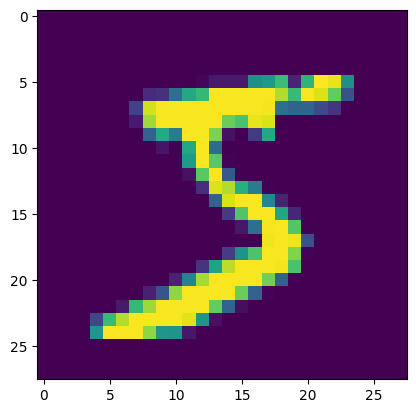

In [16]:
plt.imshow(X_train[0])

With conventional neural networks, we cannot feed in the image as input as is. So we need to flatten the images into one-dimensional vectors, each of size 1 x (28 x 28) = 1 x 784.


In [17]:
## Flatten images into one-dimensional vector

num_pixels = X_train.shape[1] * X_train.shape[2]  ## Find the size of the one dimensional vector

X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32') ## Flatten the training images
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32') ## Flatten the testing images

## Since pixel values can range from 0 to 255, let's normalize the vectors to be between 0 and 1.

In [18]:
### Normalize the inputs from 0-255 to 0-1

X_train = X_train / 255
X_test = X_test / 255

## Note that we should always divide out target variables into categories in the classification.

for that we use to_categorical.

In [19]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

num_classes = y_test.shape[1]
print(num_classes)

10


## Build a Neural Network.

In [20]:
def classification_model():
  # create a model
  model = Sequential()
  model.add(Input(shape = (num_pixels,)))
  model.add(Dense(num_pixels, activation ='relu'))
  model.add(Dense(100, activation='relu'))
  model.add(Dense(num_classes, activation = 'softmax'))

  ## Compile the Model
  model.compile(optimizer ='adam', loss='categorical_crossentropy', metrics = ['accuracy'])
  return model

In [21]:
# build the model
model = classification_model()

# fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, verbose=2)

# evaluate the model
scores = model.evaluate(X_test, y_test, verbose=0)

Epoch 1/10
1875/1875 - 27s - 14ms/step - accuracy: 0.9429 - loss: 0.1892 - val_accuracy: 0.9686 - val_loss: 0.1017
Epoch 2/10
1875/1875 - 21s - 11ms/step - accuracy: 0.9757 - loss: 0.0791 - val_accuracy: 0.9720 - val_loss: 0.0849
Epoch 3/10
1875/1875 - 21s - 11ms/step - accuracy: 0.9830 - loss: 0.0542 - val_accuracy: 0.9768 - val_loss: 0.0767
Epoch 4/10
1875/1875 - 43s - 23ms/step - accuracy: 0.9867 - loss: 0.0408 - val_accuracy: 0.9782 - val_loss: 0.0699
Epoch 5/10
1875/1875 - 38s - 20ms/step - accuracy: 0.9895 - loss: 0.0322 - val_accuracy: 0.9743 - val_loss: 0.1005
Epoch 6/10
1875/1875 - 20s - 10ms/step - accuracy: 0.9915 - loss: 0.0258 - val_accuracy: 0.9797 - val_loss: 0.0780
Epoch 7/10
1875/1875 - 20s - 11ms/step - accuracy: 0.9929 - loss: 0.0217 - val_accuracy: 0.9821 - val_loss: 0.0777
Epoch 8/10
1875/1875 - 19s - 10ms/step - accuracy: 0.9934 - loss: 0.0195 - val_accuracy: 0.9804 - val_loss: 0.0865
Epoch 9/10
1875/1875 - 21s - 11ms/step - accuracy: 0.9947 - loss: 0.0178 - val_a

In [23]:
print('Accuracy: {}%  \n Error: {}'.format(scores[1], 1- scores[1]))

Accuracy: 0.9810000061988831%  
 Error: 0.018999993801116943


Sometimes, you cannot afford to retrain your model everytime you want to use it, especially if you are limited on computational resources and training your model can take a long time. Therefore, with the Keras library, you can save your model after training. To do that, we use the save method.


In [24]:
model.save('classification_model.keras')

Since our model contains multidimensional arrays of data, then models are usually saved as .keras files.


When you are ready to use your model again, you use the load_model function from <strong>keras.saving</strong>.


In [25]:
pretrained_model = keras.saving.load_model('classification_model.keras')